In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# read in datatset
data = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv')

Let's start with a sex and race breakdown

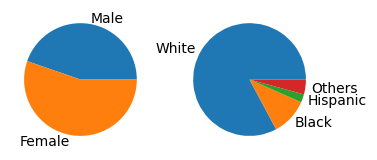

In [32]:
nMale = data['BENE_SEX_IDENT_CD'].value_counts()[1]
nFemale = data['BENE_SEX_IDENT_CD'].value_counts()[2]
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.pie([nMale,nFemale],labels=['Male','Female']);

nWhite = data['BENE_RACE_CD'].value_counts()[1]
nBlack = data['BENE_RACE_CD'].value_counts()[2]
nHispanic = data['BENE_RACE_CD'].value_counts()[5]
nOthers = data['BENE_RACE_CD'].value_counts()[3]
plt.subplot(1,2,2)
plt.pie([nWhite,nBlack,nHispanic,nOthers],labels=['White','Black','Hispanic','Others']);

Now let's see the sex breakdown of each race, see if any are disproportionally represented. 

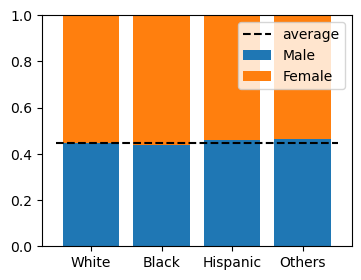

In [53]:
sexCodes = [1,2]
raceCodes = [1,2,5,3]
nSexRace = np.zeros([len(sexCodes),len(raceCodes)])
for i in range(len(nSexRace)):
    for j in range(len(nSexRace[i])):
        nSexRace[i,j] = data[(data['BENE_SEX_IDENT_CD']==sexCodes[i]) & (data['BENE_RACE_CD']==raceCodes[j])].shape[0]

plt.figure(figsize=(4,3))
plt.bar([0,1,2,3],nSexRace[0]/[nWhite,nBlack,nHispanic,nOthers],label='Male')
plt.bar([0,1,2,3],
        nSexRace[1]/[nWhite,nBlack,nHispanic,nOthers],
        bottom=nSexRace[0]/[nWhite,nBlack,nHispanic,nOthers],
       label='Female')
plt.hlines(nMale/(nMale+nFemale),
           -.5,3.5,
           color='k',
           linestyle='dashed',
          label='average')
plt.legend()
plt.ylim([0,1])
plt.xticks([0,1,2,3],['White','Black','Hispanic','Others']);